In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("../../../data/03_training_set/training_set.pkl")
X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']
s = StandardScaler()
X = s.fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

# Drzewo decyzyjne

W przypadku drzewa decyzyjnego, testowałem modele dla czterech różnych przypadków, rozróżnianych na podstawie maksymalnej głębokości drzewa (parametr `max_depth`):

1. Wariant domyślny - bez określenia parametru `max_depth` nie ma możliwości otrzymania sensownych wyników w przypadku danych testowych,
2. Wariant z maksymalną głębokością równą `3`,
3. Wariant z maksymalną głębokością równą `4`,
4. Wariant z maksymalną głębokością równą `5`.

Najlepsze wyniki otrzymałem w przypadku drzewa o maksymalnej głębokości równej `4`.

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
def decision_tree_summary(X_train, X_test, y_train, y_test, max_depth=None):
    # trenowanie modelu
    decision_tree = DecisionTreeRegressor(max_depth=max_depth)
    decision_tree.fit(X_train, y_train)
    
    # podsumowanie wynikow
    y_pred_default = decision_tree.predict(X_test)
    print(f'mean_squared_error: {mean_squared_error(y_test, y_pred_default)}')
    print(f'train score: {decision_tree.score(X_train, y_train)}')
    print(f'test score: {decision_tree.score(X_test, y_test)}')
    
    # wizualizacja
    pred_default = decision_tree.predict(X_test).astype(int)
    temp_default = y_test.values > 0
    plt.scatter(y_test.values[temp_default], pred_default[temp_default], marker=".")
    plt.xlabel("original", fontsize=12)
    plt.ylabel("predictions", fontsize=12)
    plt.show()

mean_squared_error: 391.2355834504713
train score: 0.7487027491273128
test score: -0.4685411433860034


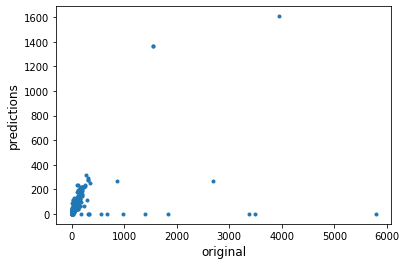

In [5]:
decision_tree_summary(X_train, X_test, y_train, y_test)

mean_squared_error: 138.51999373833107
train score: 0.3614488581869103
test score: 0.48005161444609995


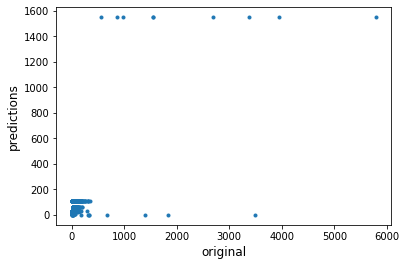

In [6]:
decision_tree_summary(X_train, X_test, y_train, y_test, max_depth=3)

mean_squared_error: 128.80282815912318
train score: 0.5275700137109008
test score: 0.516525948718835


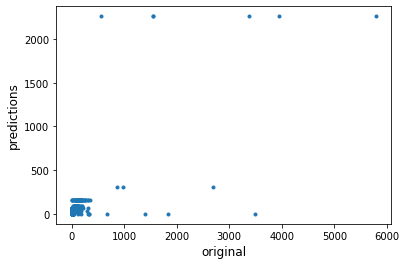

In [7]:
decision_tree_summary(X_train, X_test, y_train, y_test, max_depth=4)

mean_squared_error: 220.84181575466243
train score: 0.601680718457335
test score: 0.17104857959104847


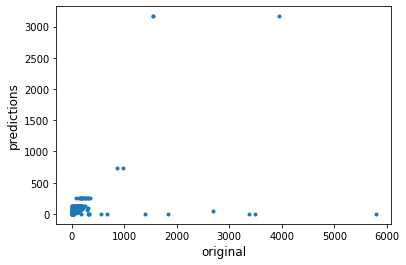

In [8]:
decision_tree_summary(X_train, X_test, y_train, y_test, max_depth=5)

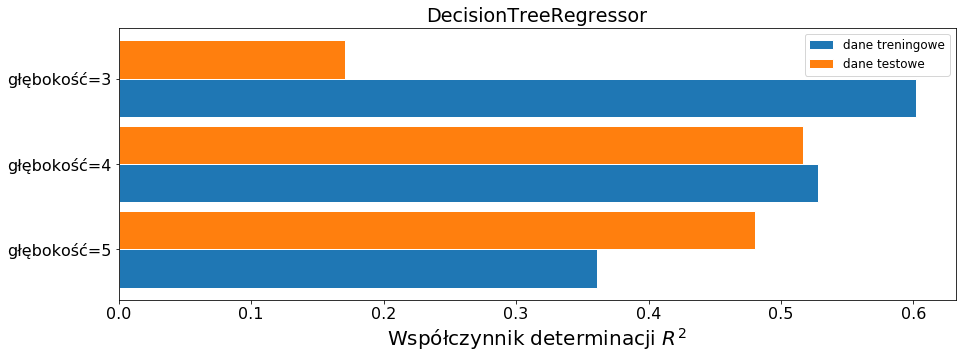

In [30]:
plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 16})
labels = ['głębokość=5', 'głębokość=4', 'głębokość=3']
train_scores = [0.3614488581869103, 0.5275700137109008, 0.601680718457335]
test_scores = [0.48005161444609995, 0.516525948718835, 0.17104857959104847]
barDim = 0.45

r1 = np.arange(len(labels))
r2 = [x + barDim for x in r1]
plt.barh(r1, train_scores, height=barDim, edgecolor='white', label='dane treningowe')
plt.barh(r2, test_scores, height=barDim, edgecolor='white', label='dane testowe')

plt.xlabel('Współczynnik determinacji $R^2$', fontsize=20)
plt.yticks([r +  barDim/2 for r in range(len(labels))], labels)

plt.title('DecisionTreeRegressor')
plt.legend(fontsize=12)
plt.savefig('../../../data/decission_tree_regressor_results.jpg')